# 实验一: 逻辑回归实现糖尿病预测

朱云沁 PB20061372


## Introduction

Suppose that we are going to solve a binary classification problem given a set of data $D = \{(\mathbf{x}_i,y_i)\}^n_{i=1}$, where the features $\mathbf{x}= (x_1,\ldots,x_d)\in \mathbb{R}^d$ and the class label $y \in \{0,1\}$ are generated from probability distributions. Following the minimum error rate principle, we can predict the class label as follows:

$$
\hat{y} = \begin{cases}
1 & \text{if } P(y=1|\mathbf{x}) > P(y=0|\mathbf{x}) \\
0 & \text{if } P(y=1|\mathbf{x}) < P(y=0|\mathbf{x})
\end{cases}
$$

As a commonly-used linear classifier, the logistic regression model simply assumes that the decision boundary $\{\mathbf{x}\in\mathbb{R}^d:P(y=1|\mathbf{x}) = P(y=0|\mathbf{x})\}$ is a hyperplane $(\mathbf{w},b)$ in the feature space by modeling the following class posterior probability:

$$
P(y=1|\mathbf{x}) = \frac{1}{1+\exp(-(\mathbf{w}^\top\mathbf{x}+b))} = \sigma(\mathbf{w}^\top\mathbf{x}+b) \tag{1}
$$

where $\sigma(\cdot)$ is the sigmoid function. Then, our prediction rule is equivalent to

$$
\hat{y} = \begin{cases}
1 & \text{if } \mathbf{w}^\top\mathbf{x}+b > 0 \\
0 & \text{if } \mathbf{w}^\top\mathbf{x}+b < 0
\end{cases}
$$

### A Probabilistic Derivation

To see the rationality behind this model, we first rewrite the posterior probability in Eq. (1) by the Bayes rule

$$
P(y=1|\mathbf{x}) = \frac{p(\mathbf{x}|y=1)P(y=1)}{p(\mathbf{x}|y=1)P(y=1)+p(\mathbf{x}|y=0)P(y=0)} = \frac{1}{1+\frac{p(\mathbf{x}|y=0)P(y=0)}{p(\mathbf{x}|y=1)P(y=1)}} \tag{2}
$$

We model these probabilities by a suite of assumptions as follows.

1. $y \sim \mathrm{Bern}(p)$, i.e. the class prior follows a Bernoulli distribution with $P(y=1) = p$ and $P(y=0) = 1-p$.
2. $x_j|_{y = 1} \overset{\text{i.i.d.}}{\sim} \mathcal{N}(\mu_{j,1},\sigma_j^2)$ and $x_j|_{y = 0} \overset{\text{i.i.d.}}{\sim} \mathcal{N}(\mu_{j,0},\sigma_j^2)$, $j=1,2,\dots, d$, i.e. the features are conditionally independent given the class label, and the class-conditional distributions are both Gaussian. Note that the variance $\sigma_j^2$ is shared by both classes. <br /> We simplify the notation by writing $\mathbf{x}|_{y = 1} \sim \mathcal{N}(\mu_1,\Sigma)$ and $\mathbf{x}|_{y = 0} \sim \mathcal{N}(\mu_0,\Sigma)$.

We can now continue our derivation from where we left in Eq. (2).

$$
P(y=1|\mathbf{x}) = \frac{1}{1+\exp\left(\log\frac{p(\mathbf{x}|y=0)P(y=0)}{p(\mathbf{x}|y=1)P(y=1)}\right)} = \frac{1}{1+\exp\left(\log\frac{p(\mathbf{x}|y=0)}{p(\mathbf{x}|y=1)}+\log\frac{1-p}{p}\right)} \tag{3}
$$

By substituting the Gaussian class-conditional distributions, we have the log likelihood ratio

$$
\log\frac{p(\mathbf{x}|y=1)}{p(\mathbf{x}|y=0)} = \log\frac{\mathcal{N}(\mathbf{x};\mu_1,\Sigma)}{\mathcal{N}(\mathbf{x};\mu_0,\Sigma)} = \Sigma^{-1}(\mu_1-\mu_0)\mathbf{x} + \frac{1}{2}(\mu_0^\top\Sigma^{-1}\mu_0-\mu_1^\top\Sigma^{-1}\mu_1) \tag{4}
$$

Plugging Eq. (4) into Eq. (3), we obtain the posterior in the form of Eq. (1) with

$$
\begin{gathered}
\mathbf{w} = \Sigma^{-1}(\mu_1-\mu_0) \\ b = \frac{1}{2}(\mu_0^\top\Sigma^{-1}\mu_0-\mu_1^\top\Sigma^{-1}\mu_1) + \log\frac{p}{1-p}
\end{gathered}\tag{5}
$$

In a nutshell, the logistic regression model makes predictions with the minimum error rate principle and a linear decision boundary by assuming that the log likelihood ratio is linear in $\mathbf{x}$.

### Learning the Parameters

As the parameters of the involved distributions are usually unknown and our assumptions of the Gaussian likelihoods may not hold in many real applications, we cannot directly apply Eq. (5) and Eq. (1) to predict the label of a new data instance. Instead, we need to learn the parameters $\mathbf{w}$ and $b$ from the training data, via the maximum likelihood estimation (MLE).

$$
\begin{aligned}
\hat{\mathbf{w}}, \hat{b} &= \underset{\mathbf{w},b}{\mathrm{argmax}} \prod_{i=1}^n P(y_i|\mathbf{x}_i;\mathbf{w},b) = \underset{\mathbf{w},b}{\mathrm{argmax}} \sum_{i=1}^n \log P(y_i|\mathbf{x}_i;\mathbf{w},b) \\
&= \underset{\mathbf{w},b}{\mathrm{argmax}} \sum_{i=1}^n \left(y_i\log P(y_i=1|\mathbf{x}_i;\mathbf{w},b) + (1-y_i)\log P(y_1=0|\mathbf{x}_i;\mathbf{w},b)\right)\\
&= \underset{\mathbf{w},b}{\mathrm{argmax}} \sum_{i=1}^n \left(y_i\log \sigma(\mathbf{w}^\top\mathbf{x}+b) + (1-y_i)\log (1-\sigma(\mathbf{w}^\top\mathbf{x}+b))\right)\\
&= \underset{\mathbf{w},b}{\mathrm{argmin}} L(\mathbf{w},b)
\end{aligned} \tag{6}
$$

where we let $L(\mathbf{w},b) = -\sum_{i=1}^n \left(y_i\log \sigma(\mathbf{w}^\top\mathbf{x}+b) + (1-y_i)\log (1-\sigma(\mathbf{w}^\top\mathbf{x}+b))\right)$ for notational simplicity. This convex optimization problem can be viewed equivalently as minimizing the cross entropy or the Kullback-Leibler divergence between the empirical distribution of the labels and the predicted distribution by our model.

It can be proved that Eq. (6) admits a solution when the data is NOT linearly separable. Alternatively, we can add a regularization term to ensure the existence of a solution. To keep things simple, we will not discuss this issue in this experiment.

#### Gradient Descent

To apply gradient descent to find the optimal parameters, we first compute the gradient of the loss $L(\mathbf{w},b)$ with respect to $\mathbf{w}$ and $b$. Note that $\sigma'(x) = \sigma(x)(1-\sigma(x))$. Therefore,

$$
\begin{aligned}
\nabla_{\mathbf{w}} L(\mathbf{w},b)
&= -\sum_{i=1}^n \left(y_i(1-\sigma(\mathbf{w}^\top\mathbf{x}_i+b)) - (1-y_i)\sigma(\mathbf{w}^\top\mathbf{x}_i+b)\right)\mathbf{x}_i \\
&= -\sum_{i=1}^n \left(y_i - \sigma(\mathbf{w}^\top\mathbf{x}_i+b)\right)\mathbf{x}_i \\
\nabla_b L(\mathbf{w},b) &=  -\sum_{i=1}^n \left(y_i(1-\sigma(\mathbf{w}^\top\mathbf{x}_i+b)) - (1-y_i)\sigma(\mathbf{w}^\top\mathbf{x}_i+b)\right) \\
&= -\sum_{i=1}^n \left(y_i - \sigma(\mathbf{w}^\top\mathbf{x}_i+b)\right)
\end{aligned}
$$

The update rule of gradient descent is then given by

$$
\begin{aligned}
\mathbf{w}^{t+1} &\leftarrow \mathbf{w}^t - \alpha \nabla_{\mathbf{w}} L(\mathbf{w}^t,b^t) \\
b^{t+1} &\leftarrow b^t - \alpha \nabla_b L(\mathbf{w}^t,b^t)
\end{aligned} \tag{7}
$$

where $\alpha$ is a hyperparameter denoting the learning rate.


#### Newton's Method

The Newton’s method is an iterative algorithm for optimization problems that uses the second-order derivative to update the parameters. The Hessian matrix of $L(\mathbf{w},b)$ can be computed as

$$
\begin{aligned}
\nabla^2_{\mathbf{w}} L(\mathbf{w},b) &= \sum_{i=1}^n \sigma(\mathbf{w}^\top\mathbf{x}_i+b)(1-\sigma(\mathbf{w}^\top\mathbf{x}_i+b))\mathbf{x}_i\mathbf{x}_i^\top \\
\nabla^2_b L(\mathbf{w},b) &= \sum_{i=1}^n \sigma(\mathbf{w}^\top\mathbf{x}_i+b)(1-\sigma(\mathbf{w}^\top\mathbf{x}_i+b))
\end{aligned}
$$

The update rule of Newton's method is then given by

$$
\begin{aligned}
\mathbf{w}^{t+1} &\leftarrow \mathbf{w}^t - \alpha (\nabla^2_{\mathbf{w}} L(\mathbf{w}^t,b^t))^{-1} \nabla_{\mathbf{w}} L(\mathbf{w}^t,b^t) \\
b^{t+1} &\leftarrow b^t - \alpha (\nabla^2_b L(\mathbf{w}^t,b^t))^{-1} \nabla_b L(\mathbf{w}^t,b^t)
\end{aligned} \tag{8}
$$

It can be shown that the Newton's method converges quadratically to the optimal solution if the Hessian matrix is positive definite (which can be achieved by regularization) and the initial point is sufficiently close to the optimal solution.

However, the computation of the Hessian matrix is expensive for large-scale problems. In real-world applications, some approximations are often used to reduce the computational cost, leading to quasi-Newton methods such as the limited-memory BFGS (L-BFGS) method. In this experiment, we will use the standard Newton's method for simplicity.


## Experiment


### Initialization


In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### Dataset Description

The dataset we use in this experiment is the [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) from Kaggle. The dataset consists of eight medical predictor variables and one target variable, i.e., whether the patient has diabetes. The detailed description of each column is listed below.

- Feature columns (0-7):
  - Pregnancies: Number of times pregnant
  - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
  - BloodPressure: Diastolic blood pressure $\mathrm{(mmHg)}$
  - SkinThickness: Triceps skin fold thickness $\mathrm{(mm)}$
  - Insulin: 2-Hour serum insulin $\mathrm{(\mu U/ml)}$
  - BMI: Body mass index $(\mathrm{kg/m^2})$
  - DiabetesPedigreeFunction: Diabetes pedigree function
  - Age: Patient's age in years
- Label column (8):
  - Outcome: 0 for healthy or 1 for diabetes


In [2]:
df = pd.read_csv('./diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Imputing Missing Values

Observing that the minimum values of six features (i.e., Glucose, BloodPressure, SkinThickness, Insulin, BMI, and Age) are zeros, we can infer that the missing values are encoded as zeros. Common strategies for handling missing values include dropping the corresponding samples or imputing them with the mean or median of the corresponding feature values. While the former strategy may lead to insufficient training data, the latter strategy may introduce bias to the resulting model. Here, we choose to replace the missing values with the corresponding median values.

In [3]:
impute_cols = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
]
df[impute_cols] = df[impute_cols].replace(0, np.NaN)
df.fillna(df.median(), inplace=True)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Standardization

To avoid the features with larger values dominating the training process, we standardize each feature by subtracting its mean and dividing by its standard deviation.

In [4]:
from sklearn.preprocessing import StandardScaler

feature_cols = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
]

scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])
df.mean(), df.std()

(Pregnancies                 1.110223e-16
 Glucose                     4.625929e-18
 BloodPressure               5.782412e-18
 SkinThickness              -1.526557e-16
 Insulin                     1.503427e-17
 BMI                         2.613650e-16
 DiabetesPedigreeFunction    2.451743e-16
 Age                         1.931325e-16
 Outcome                     3.489583e-01
 dtype: float64,
 Pregnancies                 1.000652
 Glucose                     1.000652
 BloodPressure               1.000652
 SkinThickness               1.000652
 Insulin                     1.000652
 BMI                         1.000652
 DiabetesPedigreeFunction    1.000652
 Age                         1.000652
 Outcome                     0.476951
 dtype: float64)

### Splitting into K Folds

To evaluate the performance of the trained model, we split the dataset into 5 folds and use one fold for validation and the remaining folds for training in each iteration. The final performance is reported as the average of the performance on the 5 validation sets.

In [5]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['Fold'] = -1
for fold, (train_idx, val_idx) in enumerate(kf.split(df[feature_cols], df['Outcome'])):
    df.loc[val_idx, 'Fold'] = fold

df.groupby('Outcome')['Fold'].value_counts()

Outcome  Fold
0        0       100
         1       100
         2       100
         3       100
         4       100
1        0        54
         1        54
         2        54
         3        53
         4        53
Name: count, dtype: int64

### Handling Imbalanced Data

Since the number of healthy samples is much larger than the number of diabetes samples in the dataset, the model may be biased towards the healthy class. To address this issue, we assign a larger weight to the diabetes samples in the loss function to make them more important during training. In this experiment, we treat the weight as a hyperparameter.

Alternative approaches include oversampling, undersampling, generating synthetic samples or using a different loss function such as the Focal Loss.

### Using the Scikit-Learn Library

For convenience of checking the correctness of our implementation, we compare the results with those obtained by the `LogisticRegression` class in the Scikit-Learn library.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []


def get_fold(fold):
    X_train = df[df['Fold'] != fold][feature_cols].values
    y_train = df[df['Fold'] != fold]['Outcome'].values
    X_val = df[df['Fold'] == fold][feature_cols].values
    y_val = df[df['Fold'] == fold]['Outcome'].values
    return X_train, y_train, X_val, y_val


def evaluate(y_true, y_pred, fold=4, print_results=True):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    if print_results:
        print(f'Fold {fold} Accuracy:  {accuracy}')
        print(f'Fold {fold} F1 Score:  {f1}')
        print(f'Fold {fold} Recall:    {recall}')
        print(f'Fold {fold} Precision: {precision}')
        print()
    return accuracy, f1, recall, precision


for fold in range(5):
    X_train, y_train, X_val, y_val = get_fold(fold)

    # model = LogisticRegression(penalty=None, class_weight='balanced')
    model = LogisticRegression(penalty=None)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy, f1, recall, precision = evaluate(y_val, y_pred, fold)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)

print(f'Accuracy:  {np.mean(accuracy_scores)}')
print(f'F1 Score:  {np.mean(f1_scores)}')
print(f'Recall:    {np.mean(recall_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print()

# Weights of last fold
print(f"Coefficients: {model.coef_.flatten()}")
print(f"Intercept:    {model.intercept_[0]}")

Fold 0 Accuracy:  0.7662337662337663
Fold 0 F1 Score:  0.6399999999999999
Fold 0 Recall:    0.5925925925925926
Fold 0 Precision: 0.6956521739130435

Fold 1 Accuracy:  0.8051948051948052
Fold 1 F1 Score:  0.6666666666666667
Fold 1 Recall:    0.5555555555555556
Fold 1 Precision: 0.8333333333333334

Fold 2 Accuracy:  0.7792207792207793
Fold 2 F1 Score:  0.6304347826086957
Fold 2 Recall:    0.5370370370370371
Fold 2 Precision: 0.7631578947368421

Fold 3 Accuracy:  0.7647058823529411
Fold 3 F1 Score:  0.6170212765957447
Fold 3 Recall:    0.5471698113207547
Fold 3 Precision: 0.7073170731707317

Fold 4 Accuracy:  0.7450980392156863
Fold 4 F1 Score:  0.6422018348623852
Fold 4 Recall:    0.660377358490566
Fold 4 Precision: 0.625

Accuracy:  0.7720906544435957
F1 Score:  0.6392649121466984
Recall:    0.5785464709993012
Precision: 0.7248920950307902

Coefficients: [ 0.35864773  1.18084361 -0.03436672  0.02858375 -0.13205964  0.66320468
  0.30612332  0.23940558]
Intercept:    -0.8098073751296423


### Implementation of Gradient Descent with TensorFlow

This implementation is deprecated due to performance issues.

Fold 4 Accuracy:  0.738562091503268
Fold 4 F1 Score:  0.6296296296296297
Fold 4 Recall:    0.6415094339622641
Fold 4 Precision: 0.6181818181818182

Coefficients: [ 0.35736817  1.1774452  -0.04242215  0.03389401 -0.13434482  0.66379285
  0.30392352  0.22746299]
Intercept:    -0.8180754780769348


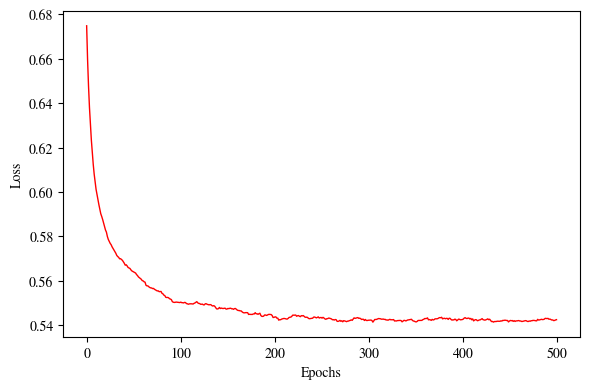

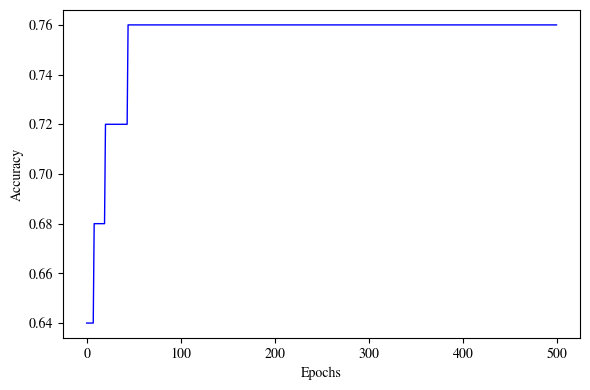

In [7]:
class LRGradientDescent(tf.keras.Model):
    '''
    Binomial Logistic Regression using Gradient Descent
    '''

    def __init__(self, n_features):
        super().__init__()
        self.w = tf.Variable(tf.zeros((n_features, 1)))
        self.b = tf.Variable(tf.zeros((1,)))
        self.alpha = 0.01  # Learning Rate
        self.class_weight = 1.0  # Weight of positive class
        self.compile()

    def call(self, X):
        z = tf.matmul(X, self.w) + self.b
        return tf.sigmoid(z)

    def predict(self, X):
        return self(X) > 0.5

    def train_step(self, data):
        X, y = data
        y = tf.cast(tf.reshape(y, (-1, 1)), tf.float32)

        # # w/ GradientTape
        # with tf.GradientTape() as tape:
        #     y_pred = self(X)
        #     loss = tf.reduce_mean(
        #         -self.class_weight * y * tf.math.log(y_pred)
        #         - (1 - y) * tf.math.log(1 - y_pred)
        #     )
        # grads = tape.gradient(loss, [self.w, self.b])
        # self.w.assign_sub(self.alpha * grads[0])
        # self.b.assign_sub(self.alpha * grads[1])

        # w/o GradientTape
        y_pred = self(X)
        loss = tf.reduce_mean(
            -self.class_weight * y * tf.math.log(y_pred)
            - (1 - y) * tf.math.log(1 - y_pred)
        )
        grad_w = tf.reduce_mean(
            (-self.class_weight * y * (1 - y_pred) + (1 - y) * y_pred) * X, axis=0
        )
        grad_w = tf.reshape(grad_w, (-1, 1))
        grad_b = tf.reduce_mean(
            -self.class_weight * y * (1 - y_pred) + (1 - y) * y_pred, axis=0
        )
        self.w.assign_sub(self.alpha * grad_w)
        self.b.assign_sub(self.alpha * grad_b)

        return {'loss': loss}

    def test_step(self, data):
        X, y = data
        y = tf.cast(tf.reshape(y, (-1, 1)), tf.float32)
        y_true = tf.cast(y, tf.bool)
        y_pred = self(X)
        cross_entropy = tf.reduce_mean(
            -y * tf.math.log(y_pred) - (1 - y) * tf.math.log(1 - y_pred)
        )
        accuracy = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred > 0.5), tf.float32))
        return {'cross_entropy': cross_entropy, 'accuracy': accuracy}


X_train, y_train, X_val, y_val = get_fold(4)

model = LRGradientDescent(len(feature_cols))
model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val,
    ),
    epochs=500,
    verbose=0,
)

y_true = y_val
y_pred = model.predict(X_val)


evaluate(y_true, y_pred)
print(f"Coefficients: {model.w.numpy().flatten()}")
print(f"Intercept:    {model.b.numpy()[0]}")

logs = model.history.history
plt.figure(figsize=(6, 4))
plt.plot(logs['val_cross_entropy'], color='r', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()

plt.figure(figsize=(6, 4))
plt.plot(logs['val_accuracy'], color='b', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()

### Implementation of Gradient Descent with NumPy

Fold 4 Accuracy:  0.7450980392156863
Fold 4 F1 Score:  0.6422018348623852
Fold 4 Recall:    0.660377358490566
Fold 4 Precision: 0.625

Coefficients: [ 0.35581201  1.16092748 -0.02223002  0.0475717  -0.12052121  0.63525923
  0.30327989  0.23304517 -0.80363846]
Intercept:    -0.8036384637820504


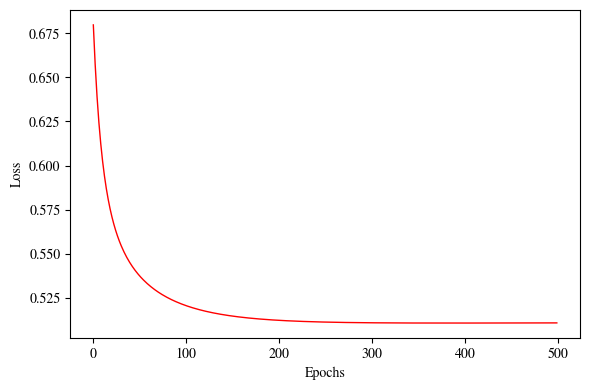

In [8]:
X_bar_train = np.concatenate([X_train, np.ones((X_train.shape[0], 1))], 1)
X_bar_val = np.concatenate([X_val, np.ones((X_val.shape[0], 1))], 1)


def predict_proba(X, w):
    return 1.0 / (1 + np.exp(-X @ w))


def predict(X, w):
    return predict_proba(X, w) > 0.5


def cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def GD(X, y, X_val, y_val, alpha=0.1, class_weight=1.0, epochs=500):
    X = np.asarray(X)
    y = np.asarray(y).reshape(-1, 1)
    X_val = np.asarray(X_val)
    y_val = np.asarray(y_val).reshape(-1, 1)
    w = np.zeros((X.shape[1], 1))
    loss = []
    for i in range(epochs):
        y_pred = predict_proba(X, w)
        grad_w = np.mean(
            (-class_weight * y * (1 - y_pred) + (1 - y) * y_pred) * X, axis=0
        ).reshape(-1, 1)
        w = w - alpha * grad_w
        y_val_pred = predict_proba(X_val, w)
        loss.append(cross_entropy(y_val, y_val_pred))

    return w, loss


w, loss = GD(X_bar_train, y_train, X_bar_val, y_val)
y_pred = predict(X_bar_val, w)
evaluate(y_val, y_pred)

print(f"Coefficients: {w.flatten()}")
print(f"Intercept:    {w[-1][0]}")


plt.figure(figsize=(6, 4))
plt.plot(loss, color='r', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()

### Implementation of Newton's Method with NumPy

Fold 4 Accuracy:  0.7450980392156863
Fold 4 F1 Score:  0.6422018348623852
Fold 4 Recall:    0.660377358490566
Fold 4 Precision: 0.625

Coefficients: [ 0.35404787  1.16684332 -0.0335982   0.02786089 -0.13026531  0.65434305
  0.30173701  0.23641544 -0.80048319]
Intercept:    -0.8004831947899048


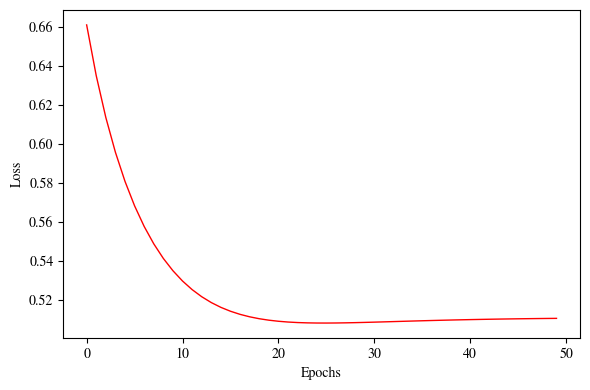

In [9]:
def Newton(X, y, X_val, y_val, alpha=0.1, class_weight=1.0, epochs=50):
    X = np.asarray(X)
    y = np.asarray(y).reshape(-1, 1)
    X_val = np.asarray(X_val)
    y_val = np.asarray(y_val).reshape(-1, 1)
    w = np.zeros((X.shape[1], 1))
    loss = []
    for i in range(epochs):
        y_pred = predict_proba(X, w)
        grad_w = np.mean(
            (-class_weight * y * (1 - y_pred) + (1 - y) * y_pred) * X, axis=0
        ).reshape(-1, 1)
        hessian_w = (class_weight * y + (1 - y)) * y_pred * (1 - y_pred)
        hessian_w = X.T @ np.diag(hessian_w.flatten()) @ X / X.shape[0]
        w = w - alpha * np.linalg.inv(hessian_w) @ grad_w
        y_val_pred = predict_proba(X_val, w)
        loss.append(cross_entropy(y_val, y_val_pred))

    return w, loss


w, loss = Newton(X_bar_train, y_train, X_bar_val, y_val)
y_pred = predict(X_bar_val, w)
evaluate(y_val, y_pred)

print(f"Coefficients: {w.flatten()}")
print(f"Intercept:    {w[-1][0]}")


plt.figure(figsize=(6, 4))
plt.plot(loss, color='r', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()

### Grid Search for Hyperparameters

We use grid search to find the optimal hyperparameters, including the learning rate and the class weight. The learning rate is chosen from $\{10^{-3}, 10^{-2}, 10^{-1}, 1\}$ and the class weight is chosen from $\{1, 1.5, 2\}$.


In [10]:
import itertools

alpha_list = [0.001, 0.01, 0.1, 1]
class_weight_list = [1, 1.5, 2]

results = []
for alpha, class_weight in itertools.product(alpha_list, class_weight_list):
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    # 5-fold cross validation
    for fold in range(5):
        X_train, y_train, X_val, y_val = get_fold(fold)
        X_bar_train = np.concatenate([X_train, np.ones((X_train.shape[0], 1))], 1)
        X_bar_val = np.concatenate([X_val, np.ones((X_val.shape[0], 1))], 1)
        w, loss = Newton(
            X_bar_train,
            y_train,
            X_bar_val,
            y_val,
            alpha=alpha,
            class_weight=class_weight,
        )
        y_pred = predict(X_bar_val, w)
        accuracy, f1, recall, precision = evaluate(
            y_val, y_pred, fold, print_results=False
        )
        
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)

    results.append(
        {
            'alpha': alpha,
            'class_weight': class_weight,
            'accuracy': np.mean(accuracy_scores),
            'f1': np.mean(f1_scores),
            'precision': np.mean(precision_scores),
            'recall': np.mean(recall_scores),
        }
    )

results = pd.DataFrame(results)
results.sort_values('f1', ascending=False).reset_index(drop=True)

,alpha,class_weight,accuracy,f1,precision,recall
0,0.001,2.0,0.742119,0.663619,0.617127,0.723829
1,0.010,2.0,0.742119,0.663619,0.617127,0.723829
2,0.100,1.5,0.762932,0.663514,0.668439,0.664081
3,1.000,1.5,0.762932,0.663514,0.668439,0.664081
4,0.100,2.0,0.735608,0.662948,0.605915,0.738784
5,1.000,2.0,0.735608,0.662948,0.605915,0.738784
6,0.010,1.5,0.761625,0.658140,0.669745,0.652900
7,0.001,1.5,0.759027,0.652964,0.667571,0.645493
8,0.100,1.0,0.773389,0.640558,0.727984,0.578546
9,1.000,1.0,0.772091,0.639265,0.724892,0.578546


## Conclusion

The results obtained by our implementation are consistent with those obtained by the Scikit-Learn library. The Newton's method converges faster than the gradient descent method. The performance of the model can be improved by tuning the hyperparameters. Specifically, we achieve the best CV accuracy of 0.772 by setting the learning rate to 0.01 and using the same weight for the two classes. The best F1 score is 0.664 when the learning rate is 0.001 and a weight of 2.0 is assigned to the diabetes samples.
